In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os

In [2]:
#read 
df=pd.read_csv('../../data/00-raw-data/WC2022 rawdata.csv',index_col=0)
df

,source,author_id,conversation_id,Tweet Point,Follows,Likes,hash_tag,id,text,keyword,official,unofficial,retweet_count
created_at,,,,,,,,,,,,,
2022-09-13T23:58:10.000Z,Twitter Web App,1.447698e+18,1.569661e+18,-0.2960,1324.0,594.0,qatar2022,1.569838e+18,@Dr_alhammadi_22 They are also the graves of t...,qatar2022,1.0,0.0,0
2022-09-13T23:31:59.000Z,Twitter for iPhone,2.986481e+09,1.569805e+18,-0.4515,697325.0,2907.0,"qatar2022,fifaworldcup",1.569831e+18,@DolapoAina @FIFAWorldCup @qatarairways @aviat...,qatar2022,1.0,0.0,65
2022-09-13T23:20:24.000Z,Twitter for iPhone,3.133369e+09,1.569828e+18,0.0000,465.0,177.0,"qatar2022,worldcup2022",1.569828e+18,If anyone knows anyone going to Qatar for the ...,qatar2022,1.0,0.0,32
2022-09-13T23:08:07.000Z,Twitter for iPhone,4.701157e+09,1.569825e+18,0.0000,334.0,1524.0,"qatar2022,fifaworldcup",1.569825e+18,67 DAYS TO GO!! \r\n\r\n#Qatar2022 #FIFAWorldC...,qatar2022,1.0,0.0,0
2022-09-13T23:07:02.000Z,Twitter Web App,1.529608e+18,1.569825e+18,0.8475,760.0,1264.0,"qatar2022,worldcup2022",1.569825e+18,@AlSultanBeach Here is a map I made for World ...,qatar2022,1.0,0.0,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-14T17:19:15.000Z,Twitter for iPhone,1.559664e+18,1.569862e+18,0.6697,1735.0,989.0,NaN,1.570100e+18,@WWE @nikkita_wwe For daily rent\r\nDuring the...,qatar world cup,0.0,1.0,0
2022-09-14T17:18:59.000Z,Twitter Web App,1.382067e+18,1.570100e+18,0.9545,82.0,843.0,NaN,1.570100e+18,I have won a Gold medal by playing Qatar Airwa...,qatar world cup,0.0,1.0,252
2022-09-14T17:18:56.000Z,Twitter for iPhone,1.559664e+18,1.569862e+18,0.6697,911.0,1547.0,NaN,1.570100e+18,@SportsCenter For daily rent\r\nDuring the Wor...,qatar world cup,0.0,1.0,0


In [3]:
import re
df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ') 
df['text'] = df['text'].str.replace('[^a-zA-Z0-9]', ' ')
df=df.drop(columns=['hash_tag'])
df=df.drop(columns='conversation_id')
df=df.drop(columns='id')
df=df.drop(columns='source')

df=df.rename(columns={'official':'label'})
df=df.reset_index(drop=True)
df.to_csv('WC cleaneddata.csv')
df=df.dropna()
df

/var/folders/3_/7844j3yx28qg31v5lrccmcv40000gn/T/ipykernel_40673/463645165.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
/var/folders/3_/7844j3yx28qg31v5lrccmcv40000gn/T/ipykernel_40673/463645165.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^a-zA-Z0-9]', ' ')


,author_id,Tweet Point,Follows,Likes,text,keyword,label,unofficial,retweet_count
0,1.447698e+18,-0.2960,1324.0,594.0,Dr alhammadi 22 They are also the graves of t...,qatar2022,1.0,0.0,0
1,2.986481e+09,-0.4515,697325.0,2907.0,DolapoAina FIFAWorldCup qatarairways aviat...,qatar2022,1.0,0.0,65
2,3.133369e+09,0.0000,465.0,177.0,If anyone knows anyone going to Qatar for the ...,qatar2022,1.0,0.0,32
3,4.701157e+09,0.0000,334.0,1524.0,67 DAYS TO GO Qatar2022 FIFAWorldCup ...,qatar2022,1.0,0.0,0
4,1.529608e+18,0.8475,760.0,1264.0,AlSultanBeach Here is a map I made for World ...,qatar2022,1.0,0.0,176
...,...,...,...,...,...,...,...,...,...
7083,1.559664e+18,0.6697,188.0,38.0,malzamaty For daily rent During the World Cu...,qatar world cup,0.0,1.0,3
7084,1.559664e+18,0.6697,1735.0,989.0,WWE nikkita wwe For daily rent During the W...,qatar world cup,0.0,1.0,0
7085,1.382067e+18,0.9545,82.0,843.0,I have won a Gold medal by playing Qatar Airwa...,qatar world cup,0.0,1.0,252
7086,1.559664e+18,0.6697,911.0,1547.0,SportsCenter For daily rent During the World...,qatar world cup,0.0,1.0,0


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
#create the model and fit the model to the data
vectorizer = CountVectorizer()
# change the dtype to int32

matrix = vectorizer.fit_transform(df.text).astype('int32')
#transform the result to a dataframe
count = pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names_out(),index=df.author_id)
#merge dataframes
df=pd.merge(df,count,on="author_id")
#drop id
#df.drop(columns=("author_id"),inplace=True)
df.to_csv('WC textdata.csv')
df

KeyboardInterrupt: 

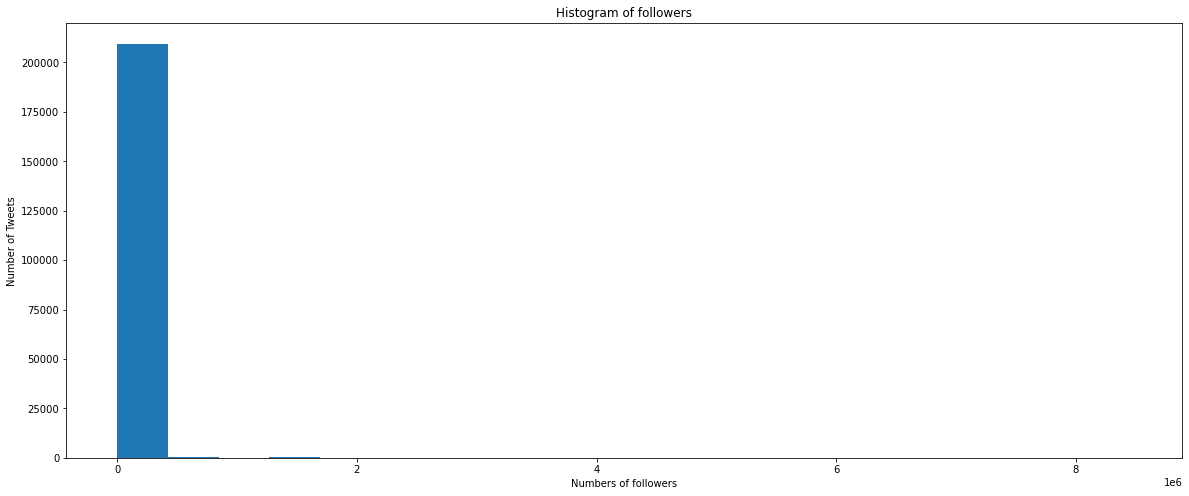

In [5]:
fig1,ax=plt.subplots(figsize=(20,8))
ax.hist(df['Follows'],bins=20)
plt.title("Histogram of followers")
plt.xlabel("Numbers of followers")
plt.ylabel("Number of Tweets")
plt.savefig('followers.png')


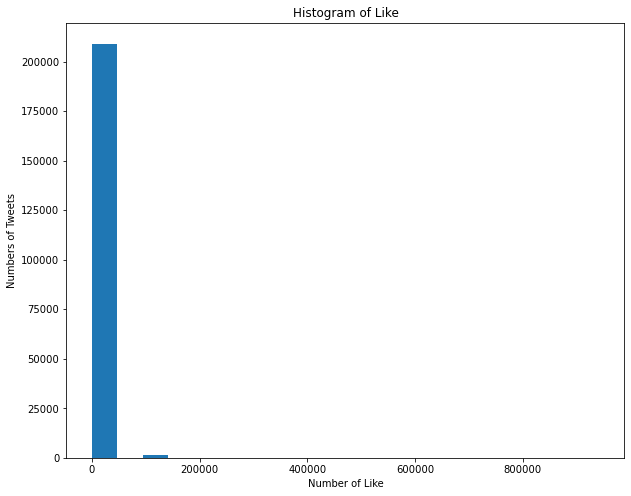

In [6]:
fig1,ax=plt.subplots(figsize=(10,8))
ax.hist(df['Likes'],bins=20)
plt.title("Histogram of Like")
plt.xlabel("Number of Like")
plt.ylabel("Numbers of Tweets")
plt.savefig('Like.png')

Text(0, 0.5, 'Numbers of Tweets')

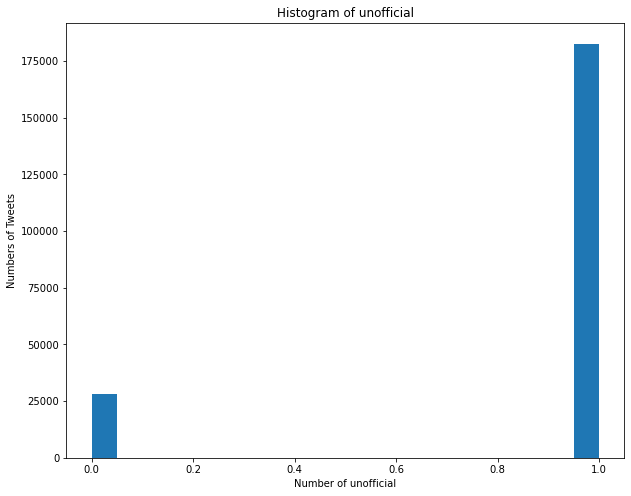

In [7]:
fig1,ax=plt.subplots(figsize=(10,8))
ax.hist(df['unofficial'],bins=20)
plt.title("Histogram of unofficial")
plt.xlabel("Number of unofficial")
plt.ylabel("Numbers of Tweets")


In [83]:
df.loc['Total']=df.sum()
df

,author_id,Tweet Point,Follows,Likes,text_x,keyword_x,label,unofficial,retweet_count,00,...,zones,zrxcyl,zscofficial,zu,zubaertani,zubizareta,zuma,zuzanasuzy111,zwadahsayyed,zxlen99
0,1.447698e+18,-0.2960,1.324000e+03,594.0,Dr alhammadi 22 They are also the graves of t...,qatar2022,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.447698e+18,-0.2960,1.324000e+03,594.0,Dr alhammadi 22 They are also the graves of t...,qatar2022,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.447698e+18,-0.2960,1.324000e+03,594.0,Dr alhammadi 22 They are also the graves of t...,qatar2022,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.447698e+18,-0.2960,1.324000e+03,594.0,Dr alhammadi 22 They are also the graves of t...,qatar2022,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.447698e+18,-0.2960,1.324000e+03,594.0,Dr alhammadi 22 They are also the graves of t...,qatar2022,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210588,8.744102e+17,-0.3182,1.060000e+02,456.0,French regional newspaper announces boycott of...,qatar world cup,0.0,1.0,7,0,...,0,0,0,0,0,0,0,0,0,0
210589,1.617887e+08,0.9022,1.990000e+02,360.0,JaniceOwen Steven stole my line It s me ...,qatar world cup,0.0,1.0,966,0,...,0,0,0,0,0,0,0,0,0,0
210590,1.382067e+18,0.9545,8.200000e+01,843.0,I have won a Gold medal by playing Qatar Airwa...,qatar world cup,0.0,1.0,252,0,...,0,0,0,0,0,0,0,0,0,0
210591,8.336884e+17,0.6808,4.910000e+02,1063.0,Germany s 2022 World Cup campaign set to becom...,qatar world cup,0.0,1.0,252,0,...,0,0,0,0,0,0,0,0,0,0
